# Decision Tree to Predict Playing of Golf

A machine learning algorithm called a decision tree, to predict if a player will play golf that day based on the weather (Outlook, Temperature, Humidity, Windy).



In [6]:

## import dependencies
from sklearn import tree #For our Decision Tree
import pandas as pd # For our DataFrame
import pydotplus # To create our Decision Tree Graph
#the below works on Google Collab
#from sklearn.externals.six import StringIO 

#the below works on Desktop Jupyther
import six
import sys
sys.modules['sklearn.externals.six'] = six

from IPython.display import Image 
from sklearn.tree import export_graphviz
from IPython.display import Image  # To Display a image of our graph
#the following is important to display the graph.
#search for the following in your computer
#if you are using the new anconda this line of code is not required. you can comment it. 
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/HP/Anaconda3/Library/bin/graphviz'


 


Data Description:very column/feature/attribute (Outlook, Temperature, Humidity, Windy, Play).


Outlook = The outlook of the weather

Temperature = The temperature of the weather

Humidity = The humidity of the weather

Windy = A variable if it is windy that day or not

Play = The target variable, tells if the golfer played golf that day or not


 values in each of the columns

Outlook values: sunny, overcast, rainy

Temperature values: hot, mild, cold

Humidity values: high, normal

Windy values: true, false

Play values: yes, no

In [7]:
# #Create the dataset
# #create empty data frame
# golf_df = pd.DataFrame()

# #add outlook
# golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
#                      'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
#                      'overcast', 'rainy']

# #add temperature
# golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
#                          'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

# #add humidity
# golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
#                       'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

# #add windy
# golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
#                    'false', 'false', 'false', 'true', 'true', 'false', 'true']

# #finally add play
# golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
#                   'yes', 'yes', 'no']


# #Print/show the new 
# #Windy - False-Weak, True-Strong
# print(golf_df)

In [8]:
#Do not use
#Create the dataset
#create empty data frame
golf_df = pd.read_csv("Weather2.csv")

In [9]:
golf_df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Striping data of EmptySpace in Any Column

In [ ]:
#golf_df['Temperature'] = golf_df['Temperature'].str.strip()


# One Hot Encoding 

 Outlook are of 3 types. On Row 0 we have Outlook=sunny so the value of Outlook_sunny is 1

In [10]:

one_hot_data = pd.get_dummies(golf_df[ ['Outlook','Temperature','Humidity','Windy'] ])
#print the new dummy data


one_hot_data
#full_X has 14 rows of data
full_X=one_hot_data
one_hot_data

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


In [11]:
golf_df['Play'] = golf_df['Play'].str.strip()
golf_df['Play']

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [13]:
#full_Y has 14 rows of data
full_Y=golf_df['Play']

In [14]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#X_train,X_test,y_train,y_test=train_test_split(one_hot_data,golf_df['Play'],test_size=0.001,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(one_hot_data,golf_df['Play'],test_size=0.25,random_state=20)


In [15]:
X_train.shape

(10, 9)

# Entropy- Information Gain

In [16]:
#default Decistion tree is Gini. For Entropy Here we have to specify criterion="entropy"
# The decision tree classifier.
#clf_ent = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_ent = tree.DecisionTreeClassifier(criterion="entropy")
# Training the Decision Tree
clf_ent_train = clf_ent.fit(X_train, y_train)
#clf_ent_train = clf_ent.fit(X_train, y_train)

In [17]:
clf_ent_train

DecisionTreeClassifier(criterion='entropy')

In [18]:
X_train

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
5,True,0,1,0,1,0,0,0,1
0,False,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
7,False,0,0,1,0,0,1,1,0
6,True,1,0,0,1,0,0,0,1
4,False,0,1,0,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1
12,False,1,0,0,0,1,0,0,1
10,True,0,0,1,0,0,1,0,1
3,False,0,1,0,0,0,1,1,0


# Draw the Trees 

In [19]:

# Export/Print a decision tree in DOT format.

print(tree.export_graphviz(clf_ent_train, None))

#X[0] is outlook overcast
#Label X[0]  has total samples nsamples = 14 , nvalue = [5, 9] 5=yes and 9=no


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[3] <= 0.5\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]"] ;
1 [label="X[0] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="entropy = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
1 -> 2 ;
3 [label="X[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
1 -> 3 ;
4 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 5 ;
6 [label="X[0] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
6 -> 7 ;
8 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6 -> 8 ;
}


In [20]:
#Create Dot Data
#dot_data = tree.export_graphviz(clf_ent_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
#                                class_names=['Play', 'Play_Not'], rounded=True, filled=True) 
dot_data = tree.export_graphviz(clf_ent_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                 class_names=True, rounded=True, filled=True) 
#export_graphviz(

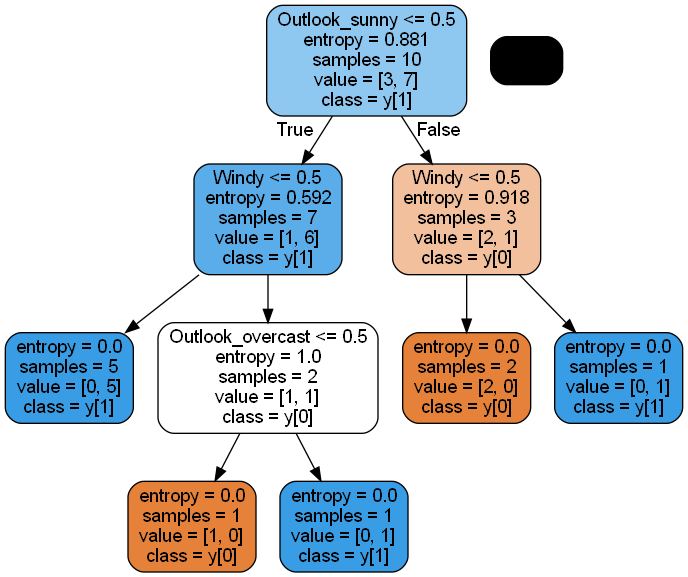

In [21]:
#Entropy decides which attribute/feature should be 
#placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
#not to be used
#dot_data = StringIO()
#export_graphviz(clf_ent_train, out_file=dot_data,filled=True, rounded=True,special_characters=True,
#                feature_names=['Outlook_overcast','Outlook_rainy','Outlook_sunny','Temperature_cool','Temperature_hot',
#                               'Temperature_mild','Humidity_high','Humidity_normal','Windy_false','Windy_true'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [22]:
y_ent_pred=clf_ent_train.predict(X_test)

In [23]:
X_test

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
13,True,0,1,0,0,0,1,1,0
11,True,1,0,0,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
1,True,0,0,1,0,1,0,1,0


In [24]:
y_ent_pred

array(['no', 'yes', 'no', 'yes'], dtype=object)

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_ent_pred)
cnf_matrix


array([[1, 1],
       [1, 1]], dtype=int64)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_ent_pred))

Accuracy: 0.5


# Training Data Set Accuracy

In [39]:
train_y_ent_pred=clf_ent_train.predict(X_train)

In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, train_y_ent_pred)
cnf_matrix

array([[3, 0],
       [0, 7]], dtype=int64)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_train, train_y_ent_pred))

Accuracy: 1.0


# Build a new Decision Tree with all the data -14 rows

In [43]:
#default Decistion tree is Gini. For Entropy Here we have to specify criterion="entropy"
# The decision tree classifier.
#clf_ent = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_ent_full = tree.DecisionTreeClassifier(criterion="entropy")
# Training the Decision Tree
clf_ent_full = clf_ent_full.fit(full_X, full_Y)
clf_ent_full 

DecisionTreeClassifier(criterion='entropy')

In [44]:
#full_X

In [45]:

# Export/Print a decision tree in DOT format.

#print(tree.export_graphviz(clf_ent_full, None))
    #export_graphviz(
print(tree.export_graphviz(clf_ent_full ))
    
#X[0] is outlook overcast
#Label X[0]  has total samples nsamples = 14 , nvalue = [5, 9] 5=yes and 9=no


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[1] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[8] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 3 ;
4 [label="X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
4 -> 6 ;
7 [label="X[0] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 8 ;
9 [label="X[4] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 9 ;
10 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
9 -> 10 ;
11 [label="entropy = 0.0\nsamples = 1\nvalue = [1, 0]"] ;

In [46]:
#Create Dot Data
#dot_data = tree.export_graphviz(clf_ent_full, out_file=None, feature_names=list(full_X.columns.values), 
#                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) 
dot_data = tree.export_graphviz(clf_ent_full, out_file=None, feature_names=list(full_X.columns.values), 
                                class_names=True, rounded=True, filled=True) 


Description of the Decision Tree Graph

Outlook_overcast: has the least entropy and more gain so it is selected as the root node.<br>
entropy =0.94 is the entropy of the entire data set<br>
total samples =14<br>
value [5-no play and 9-play]<br><br>

class<br>
y[1]=no_play<br>

y[0]=play<br>


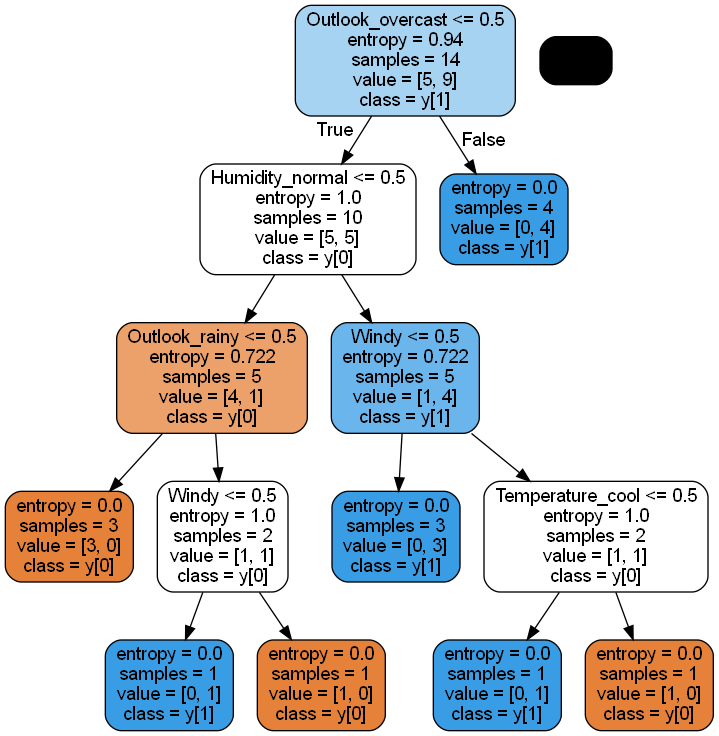

In [47]:
#Entropy decides which attribute/feature should be 
#placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# BUILDING A NEW DECISION TREE USING GINI-INDEX 

we are splitting the data into tranining and test data

In [48]:
#tree.DecisionTreeClassifier(
# The decision tree classifier.
clf_gini = tree.DecisionTreeClassifier()
# Training the Decision Tree
#clf_train = clf.fit(one_hot_data, golf_df['Play'])
clf_gini_train = clf_gini.fit(X_train, y_train)

In [49]:

# Export/Print a decision tree in DOT format.

print(tree.export_graphviz(clf_gini_train, None))

#X[0] is outlook overcast
#Label X[0]  has total samples nsamples = 14 , nvalue = [3, 7] 3=no play and 7=Play


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[3] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]"] ;
1 [label="X[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
1 -> 2 ;
3 [label="X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 5 ;
6 [label="X[7] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
6 -> 8 ;
}


In [50]:
#Create Dot Data
 

dot_data_gini = tree.export_graphviz(clf_gini_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                 class_names=True, rounded=True, filled=True) 


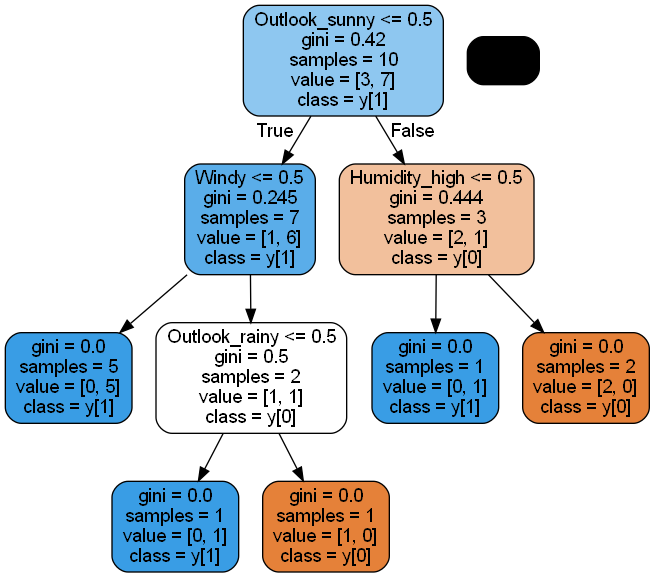

In [51]:
#Entropy decides which attribute/feature should be 
#placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data_gini)

# Show graph
Image(graph.create_png())

In [52]:
#Do not use

#dot_data = StringIO()
#export_graphviz(clf_train, out_file=dot_data,filled=True, rounded=True,special_characters=True,
#                feature_names=['Outlook_overcast','Outlook_rainy','Outlook_sunny','Temperature_cool','Temperature_hot',
#                               'Temperature_mild','Humidity_high','Humidity_normal','Windy_false','Windy_true'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [53]:
y_pred=clf_gini_train.predict(X_test)

In [54]:
X_test

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
13,True,0,1,0,0,0,1,1,0
11,True,1,0,0,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
1,True,0,0,1,0,1,0,1,0


In [55]:
y_test

13     no
11    yes
8     yes
1      no
Name: Play, dtype: object

In [56]:
y_pred

array(['no', 'yes', 'yes', 'no'], dtype=object)

In [57]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[2, 0],
       [0, 2]], dtype=int64)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# End